# Решение тех задания от SHIFT

## Инсталяция необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

## Загрузка данных из файла в датафрейм

In [3]:
# Загрузка данных
train: pd.DataFrame = pd.read_csv('../data/shift_ml_2026_train.csv')
train

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,годовой_доход,подтвержден_ли_доход,итоговый_статус_займа,рейтинг_OCR,платежный_график,коэфф_акционных_зачислений_в_остатке,цель_займа,кол_во_субсидий_за_год,индекс_проживания,регион,пдн,пос_стоп_фактор,юридический_статус,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,дата_первого_займа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_месяцев_с_последней_просрочки,кол-во_месяцев_с_последнего_займа,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,первоначальный_статус_займа,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,пени_за_дефолт,дата_следующей_выплаты,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,кол-во_месяцев_с_последнего_нарушения,код_политики,тип_займа,совокупный_доход_заемщиков,совокупный_пдн_заемщиков,совокупный_статус_подтверждения_доходов_заемщиков,кол-во_текущих_просроченных_счетов,общая_сумма_взысканий,возвраты_с_учетом_мпл,общая_сумма_на_счетах,кол-во_открытых_счетов_за_полгода,кол-во_текущих_аннуитетных_счетов,кол-во_аннуитетных_счетов_за_год,кол-во_аннуитетных_счетов_за_2_года,кол-во_месяцев_с_посл_аннуитетного_счета,текущий_баланс_по_аннуитетным_счетам,соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам,кол-во_возоб_счетов_за_год,кол-во_возоб_счетов_за_2_года,макс_баланс_по_возоб_счетам,соотношение_баланса_к_лимиту_общее,общий_лимит_по_возоб_счету,кол-во_финансовых_запросов,кол-во_финансовых_операций,кол-во_заявок_на_кредит_за_год,кол-во_открытых_счетов_за_2_года,средний_баланс_текущих_счетов,суммарная_доступная_сумма_займа_по_картам,соотношение_баланса_к_лимиту_по_картам,кол-во_списаний_за_год,сумма_задолженности,кол-во_месяцев_с_первого_аннуитетного_счета,кол-во_месяцев_с_первого_возобновляемого_счета,кол-во_месяцев_с_последнего_возобновляемого_счета,кол-во_месяцев_с_последнего_счета,кол-во_ипотек,кол-во_месяцев_с_последней_карты,кол-во_мес_с_последней_задолженности_по_карте,кол-во_мес_с_последней_заявки,кол-во_мес_с_последней_задолженности_по_возобновляемому_счету,кол-во_счетов_с_просрочкой_4_мес,кол-во_активных_карт,кол-во_активных_возобновляемых_счетов,кол-во_карт_без_нарушений,кол-во_карт,кол-во_аннуитетных_счетов,кол-во_открытых_возобновляемых_счетов,кол-во_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_счетов_без_нарушений,кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес,кол-во_счетов_с_акт_просрочкой_1_мес,кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
0,68355089,1235000.0,3 года,11.99,41014.0,В,В1,инженер,10+ лет,ИПОТЕКА,1300000.0,Не подтвержден,0,4,n,0.899168,мелкий_бизнес,0,577.0,Новгородская область,16.06,Нет,Нет,1.0,1.345312e+06,0.767016,12-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,а,0.0,0.0,False,NaN,5,0.0,NaN,1.0,Индивидуальный,NaN,NaN,NaN,0.0,0.0,12213,10219800.0,1.0,1.0,0.0,1.0,19.0,900250.0,73.0,2.0,3.0,6472.0,29.0,5590000.0,0.0,0.0,6.0,4.0,486650.0,2891500.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,15700850.0,1973750.0,3965000.0,1233350.0,NaN,Нет,Наличные
1,68341763,1000000.0,5 лет,10.78,21633.0,Б,Б4,водитель грузовика,10+ лет,ИПОТЕКА,1260000.0,Не подтвержден,0,2,n,0.489891,улучшение_жилищных_условий,0,605.0,Республика Татарстан,10.78,Нет,Нет,0.0,1.345312e+06,0.229990,8-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,а,0.0,0.0,NaN,NaN,1,0.0,NaN,1.0,Совместный,3550000.0,13.85,Не подтвержден,0.0,0.0,36245,9484950.0,0.0,1.0,0.0,4.0,19.0,541350.0,73.0,0.0,2.0,2

In [4]:
test: pd.DataFrame = pd.read_csv('../data/shift_ml_2026_test.csv')
test

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,годовой_доход,подтвержден_ли_доход,рейтинг_OCR,платежный_график,коэфф_акционных_зачислений_в_остатке,цель_займа,кол_во_субсидий_за_год,индекс_проживания,регион,пдн,пос_стоп_фактор,юридический_статус,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,дата_первого_займа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_месяцев_с_последней_просрочки,кол-во_месяцев_с_последнего_займа,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,первоначальный_статус_займа,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,пени_за_дефолт,дата_следующей_выплаты,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,кол-во_месяцев_с_последнего_нарушения,код_политики,тип_займа,совокупный_доход_заемщиков,совокупный_пдн_заемщиков,совокупный_статус_подтверждения_доходов_заемщиков,кол-во_текущих_просроченных_счетов,общая_сумма_взысканий,возвраты_с_учетом_мпл,общая_сумма_на_счетах,кол-во_открытых_счетов_за_полгода,кол-во_текущих_аннуитетных_счетов,кол-во_аннуитетных_счетов_за_год,кол-во_аннуитетных_счетов_за_2_года,кол-во_месяцев_с_посл_аннуитетного_счета,текущий_баланс_по_аннуитетным_счетам,соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам,кол-во_возоб_счетов_за_год,кол-во_возоб_счетов_за_2_года,макс_баланс_по_возоб_счетам,соотношение_баланса_к_лимиту_общее,общий_лимит_по_возоб_счету,кол-во_финансовых_запросов,кол-во_финансовых_операций,кол-во_заявок_на_кредит_за_год,кол-во_открытых_счетов_за_2_года,средний_баланс_текущих_счетов,суммарная_доступная_сумма_займа_по_картам,соотношение_баланса_к_лимиту_по_картам,кол-во_списаний_за_год,сумма_задолженности,кол-во_месяцев_с_первого_аннуитетного_счета,кол-во_месяцев_с_первого_возобновляемого_счета,кол-во_месяцев_с_последнего_возобновляемого_счета,кол-во_месяцев_с_последнего_счета,кол-во_ипотек,кол-во_месяцев_с_последней_карты,кол-во_мес_с_последней_задолженности_по_карте,кол-во_мес_с_последней_заявки,кол-во_мес_с_последней_задолженности_по_возобновляемому_счету,кол-во_счетов_с_просрочкой_4_мес,кол-во_активных_карт,кол-во_активных_возобновляемых_счетов,кол-во_карт_без_нарушений,кол-во_карт,кол-во_аннуитетных_счетов,кол-во_открытых_возобновляемых_счетов,кол-во_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_счетов_без_нарушений,кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес,кол-во_счетов_с_акт_просрочкой_1_мес,кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
0,85540387,450000.0,3 года,9.49,14413.0,Б,Б2,обслуживание клиентов,10+ лет,ИПОТЕКА,840000.0,Не подтвержден,4,n,0.458947,консолидация_долга,0,601.0,Республика Татарстан,19.09,Нет,Да,0.0,1.345312e+06,0.812613,6-1995,740.0,744.0,0.0,NaN,NaN,11.0,0.0,7735.0,34.1,20.0,а,0.0,0.0,NaN,NaN,1,0.0,NaN,1.0,Индивидуальный,NaN,NaN,NaN,0.0,0.0,92843,3111700.0,0.0,2.0,1.0,2.0,10.0,793850.0,78.0,0.0,1.0,2594.0,55.0,1135000.0,1.0,1.0,2.0,3.0,282900.0,395700.0,45.4,0.0,0.0,112.0,253.0,17.0,10.0,2.0,17.0,NaN,10.0,NaN,0.0,3.0,5.0,4.0,6.0,7.0,8.0,11.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,75.0,0.0,0.0,4282850.0,1180600.0,725000.0,1022000.0,NaN,Нет,Наличные
1,28112500,400000.0,3 года,6.03,12174.5,А,А1,помощник по правовым вопросам,5 лет,АРЕНДА,1520000.0,Не подтвержден,4,n,0.006964,консолидация_долга,0,112.0,Новосибирская область,20.42,Нет,Нет,0.0,1.345312e+06,0.725167,12-1997,710.0,714.0,0.0,NaN,NaN,14.0,0.0,23650.0,78.6,28.0,б,0.0,0.0,NaN,NaN,1,0.0,NaN,1.0,Индивидуальный,NaN,NaN,NaN,0.0,0.0,43004,2381050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1505000.0,NaN,NaN,NaN,1.0,18

In [5]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"\nКолонки в train: {train.columns.tolist()}")
print(f"\nТипы данных:\n{train.dtypes.value_counts()}")

# Анализ целевой переменной
target: str = 'итоговый_статус_займа'
print(f"\nРаспределение целевой переменной:\n{train[target].value_counts(normalize=True)}")

Train shape: (1210779, 109)
Test shape: (134531, 108)

Колонки в train: ['id', 'сумма_займа', 'срок_займа', 'процентная_ставка', 'аннуитет', 'рейтинг', 'допрейтинг', 'профессия_заемщика', 'стаж', 'владение_жильем', 'годовой_доход', 'подтвержден_ли_доход', 'итоговый_статус_займа', 'рейтинг_OCR', 'платежный_график', 'коэфф_акционных_зачислений_в_остатке', 'цель_займа', 'кол_во_субсидий_за_год', 'индекс_проживания', 'регион', 'пдн', 'пос_стоп_фактор', 'юридический_статус', 'кол-во_просрочек_за_два_года', 'коэфф_невыплаченного_сумм_остатка', 'коэфф_исходного_платежа', 'дата_первого_займа', 'нижний_порог_рейтинга_заемщика', 'верхний_порог_рейтинга_заемщика', 'кол-во_заявок_за_полгода', 'кол-во_месяцев_с_последней_просрочки', 'кол-во_месяцев_с_последнего_займа', 'кол-во_открытых_счетов', 'кол-во_записей_в_общедоступных_документах', 'оборотный_баланс', 'коэфф_загрузки_возобновляемого_счета', 'кол-во_счетов', 'первоначальный_статус_займа', 'непогашенная_сумма_из_тела_займов', 'сумма_выплат_по_

## Анализ пропусков в данных

In [6]:
missing_train = train.isnull().sum() / len(train) * 100
missing_train

id                                   0.000000
сумма_займа                          0.000000
срок_займа                           0.000000
процентная_ставка                    0.000000
аннуитет                             0.000000
                                      ...    
лимит_по_картам                      3.508650
лимит_по_аннуитетным_счетам          5.018835
кредитный_баланс_по_возоб_счетам    98.611803
особая_ситуация                      0.000000
тип_предоставления_кредита           0.000000
Length: 109, dtype: float64

In [7]:
missing_test = test.isnull().sum() / len(test) * 100
missing_test

id                                   0.000000
сумма_займа                          0.000000
срок_займа                           0.000000
процентная_ставка                    0.000000
аннуитет                             0.000000
                                      ...    
лимит_по_картам                      3.567208
лимит_по_аннуитетным_счетам          5.024864
кредитный_баланс_по_возоб_счетам    98.646409
особая_ситуация                      0.000000
тип_предоставления_кредита           0.000000
Length: 108, dtype: float64

In [8]:
missing_df = pd.DataFrame({
    'train_missing_%': missing_train,
    'test_missing_%': missing_test
}).sort_values('train_missing_%', ascending=False)
missing_df

,train_missing_%,test_missing_%
дата_следующей_выплаты,100.000000,100.000000
кредитный_баланс_по_возоб_счетам,98.611803,98.646409
совокупный_статус_подтверждения_доходов_заемщиков,98.096267,98.108243
совокупный_пдн_заемщиков,98.081318,98.092633
совокупный_доход_заемщиков,98.081153,98.091890
...,...,...
сумма_задолженности,0.000000,0.000000
тип_займа,0.000000,0.000000
тип_предоставления_кредита,0.000000,0.000000
цель_займа,0.000000,0.000000


## Визуализация пропусков в данных

<Figure size 1200x600 with 0 Axes>

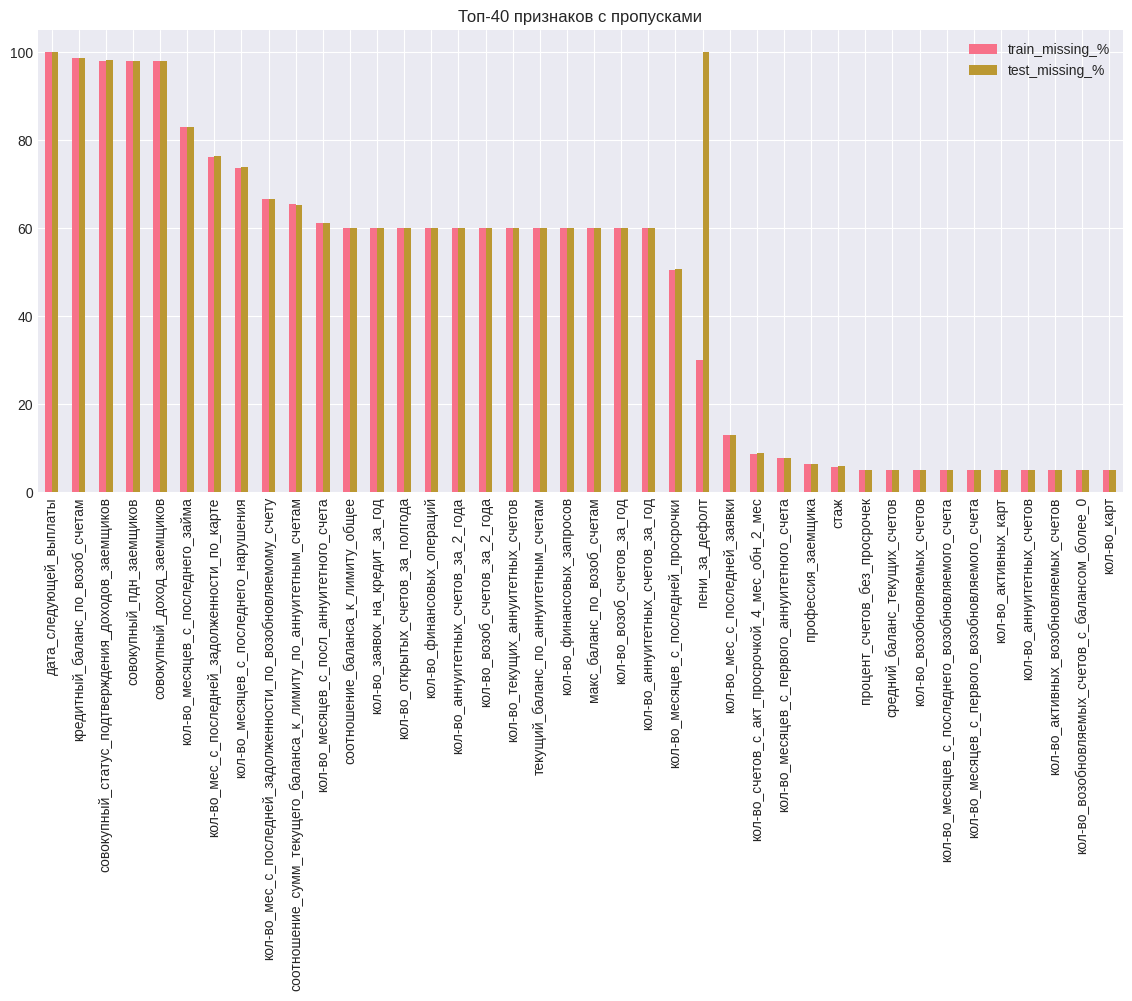

In [10]:
plt.figure(figsize=(12, 6))
missing_df.head(40).plot(kind='bar', figsize=(14, 6))
plt.title('Топ-40 признаков с пропусками')
plt.show()

## Анализ числовых признаков

In [12]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
if target in numeric_cols:
    numeric_cols.remove(target)
numeric_cols

['id',
 'сумма_займа',
 'процентная_ставка',
 'аннуитет',
 'годовой_доход',
 'рейтинг_OCR',
 'коэфф_акционных_зачислений_в_остатке',
 'кол_во_субсидий_за_год',
 'индекс_проживания',
 'пдн',
 'кол-во_просрочек_за_два_года',
 'коэфф_невыплаченного_сумм_остатка',
 'коэфф_исходного_платежа',
 'нижний_порог_рейтинга_заемщика',
 'верхний_порог_рейтинга_заемщика',
 'кол-во_заявок_за_полгода',
 'кол-во_месяцев_с_последней_просрочки',
 'кол-во_месяцев_с_последнего_займа',
 'кол-во_открытых_счетов',
 'кол-во_записей_в_общедоступных_документах',
 'оборотный_баланс',
 'коэфф_загрузки_возобновляемого_счета',
 'кол-во_счетов',
 'непогашенная_сумма_из_тела_займов',
 'сумма_выплат_по_просрочкам',
 'дата_следующей_выплаты',
 'грейд_на_детерминаторе',
 'кол-во_взысканий_за_последний_год',
 'кол-во_месяцев_с_последнего_нарушения',
 'код_политики',
 'совокупный_доход_заемщиков',
 'совокупный_пдн_заемщиков',
 'кол-во_текущих_просроченных_счетов',
 'общая_сумма_взысканий',
 'возвраты_с_учетом_мпл',
 'общая_

## Распределение ключевых числовых признаков

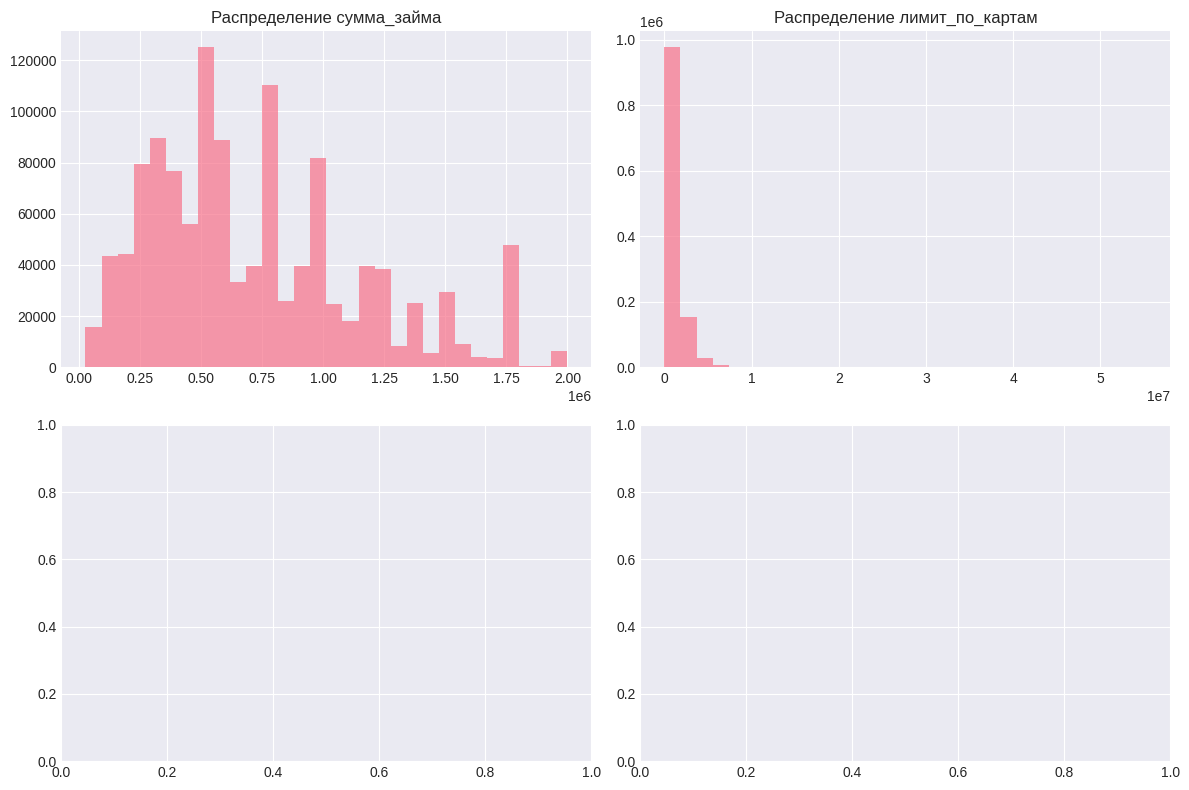

In [13]:
key_numeric = ['сумма_займа', 'лимит_по_картам', 'возраст', 'доход']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, col in zip(axes.ravel(), key_numeric):
    if col in train.columns:
        train[col].hist(ax=ax, bins=30, alpha=0.7)
        ax.set_title(f'Распределение {col}')
plt.tight_layout()
plt.show()

## Корреляции с целевой переменной

In [14]:
numeric_cols_filtered = [col for col in numeric_cols if train[col].notnull().sum() > 100000]
numeric_cols_filtered

['id',
 'сумма_займа',
 'процентная_ставка',
 'аннуитет',
 'годовой_доход',
 'рейтинг_OCR',
 'коэфф_акционных_зачислений_в_остатке',
 'кол_во_субсидий_за_год',
 'индекс_проживания',
 'пдн',
 'кол-во_просрочек_за_два_года',
 'коэфф_невыплаченного_сумм_остатка',
 'коэфф_исходного_платежа',
 'нижний_порог_рейтинга_заемщика',
 'верхний_порог_рейтинга_заемщика',
 'кол-во_заявок_за_полгода',
 'кол-во_месяцев_с_последней_просрочки',
 'кол-во_месяцев_с_последнего_займа',
 'кол-во_открытых_счетов',
 'кол-во_записей_в_общедоступных_документах',
 'оборотный_баланс',
 'коэфф_загрузки_возобновляемого_счета',
 'кол-во_счетов',
 'непогашенная_сумма_из_тела_займов',
 'сумма_выплат_по_просрочкам',
 'грейд_на_детерминаторе',
 'кол-во_взысканий_за_последний_год',
 'кол-во_месяцев_с_последнего_нарушения',
 'код_политики',
 'кол-во_текущих_просроченных_счетов',
 'общая_сумма_взысканий',
 'возвраты_с_учетом_мпл',
 'общая_сумма_на_счетах',
 'кол-во_открытых_счетов_за_полгода',
 'кол-во_текущих_аннуитетных_сч

In [15]:
correlations = train[numeric_cols_filtered + [target]].corr()[target].abs().sort_values(ascending=False)
correlations

итоговый_статус_займа                1.000000
процентная_ставка                    0.258279
сумма_выплат_по_просрочкам           0.140362
нижний_порог_рейтинга_заемщика       0.130692
верхний_порог_рейтинга_заемщика      0.130690
                                       ...   
общая_сумма_взысканий                0.000429
коэфф_исходного_платежа              0.000140
коэфф_невыплаченного_сумм_остатка         NaN
непогашенная_сумма_из_тела_займов         NaN
код_политики                              NaN
Name: итоговый_статус_займа, Length: 86, dtype: float64

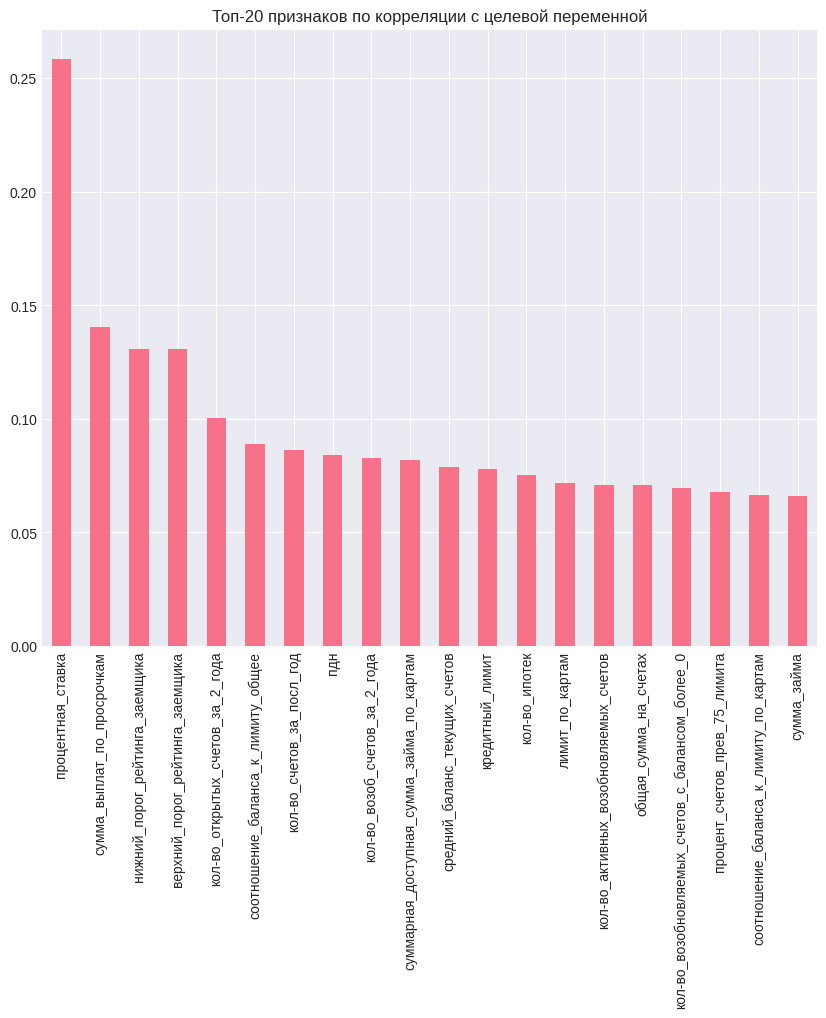

In [16]:
plt.figure(figsize=(10, 8))
correlations[1:21].plot(kind='bar')
plt.title('Топ-20 признаков по корреляции с целевой переменной')
plt.show()

## Анализ категориальных признаков

In [17]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
print(f"\nКатегориальные признаки ({len(categorical_cols)}): {categorical_cols}")


Категориальные признаки (19): ['срок_займа', 'рейтинг', 'допрейтинг', 'профессия_заемщика', 'стаж', 'владение_жильем', 'подтвержден_ли_доход', 'платежный_график', 'цель_займа', 'регион', 'пос_стоп_фактор', 'юридический_статус', 'дата_первого_займа', 'первоначальный_статус_займа', 'пени_за_дефолт', 'тип_займа', 'совокупный_статус_подтверждения_доходов_заемщиков', 'особая_ситуация', 'тип_предоставления_кредита']


In [18]:
if 'пол' in categorical_cols:
    plt.figure(figsize=(8, 4))
    train.groupby('пол')[target].mean().plot(kind='bar')
    plt.title('Вероятность дефолта по полу')
    plt.show()

## Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

def advanced_preprocessing(train_df, test_df, target_col='итоговый_статус_займа'):
    """
    Улучшенная предобработка с учетом специфики данных
    """
    # Сохраняем ID
    train_ids = train_df['id'].copy() if 'id' in train_df.columns else None
    test_ids = test_df['id'].copy()
    
    # Объединяем для согласованной обработки
    df = pd.concat([train_df, test_df], ignore_index=True)
    
    # Удаляем дубликаты ID
    df = df.drop_duplicates(subset='id', keep='first')
    
    # 1. Обработка дат
    if 'дата_первого_займа' in df.columns:
        df['дата_первого_займа'] = pd.to_datetime(df['дата_первого_займа'], format='%m-%Y', errors='coerce')
        current_date = pd.Timestamp('2026-01-01')  # Предполагаемая дата анализа
        df['стаж_кредитной_истории_мес'] = ((current_date - df['дата_первого_займа']).dt.days / 30).fillna(0)
        df = df.drop(columns=['дата_первого_займа'])
    
    # 2. Обработка сроков займа
    if 'срок_займа' in df.columns:
        df['срок_займа_мес'] = df['срок_займа'].str.extract('(\d+)').astype(float)
        df['срок_займа_мес'] = df['срок_займа_мес'] * 12  # Преобразуем годы в месяцы
        df = df.drop(columns=['срок_займа'])
    
    # 3. Кодирование рейтингов (порядковые признаки)
    rating_order = {'А': 1, 'Б': 2, 'В': 3, 'Г': 4, 'Д': 5, 'Е': 6, 'Ж': 7}
    if 'рейтинг' in df.columns:
        df['рейтинг_encoded'] = df['рейтинг'].map(rating_order).fillna(0)
        df = df.drop(columns=['рейтинг'])
    
    # 4. Создание новых признаков
    # Отношение платежа к доходу
    if 'аннуитет' in df.columns and 'годовой_доход' in df.columns:
        df['аннуитет_к_доходу'] = df['аннуитет'] * 12 / df['годовой_доход'].replace(0, 1)
    
    # Использование кредитного лимита
    if 'кредитный_баланс_без_ипотеки' in df.columns and 'кредитный_лимит' in df.columns:
        df['коэфф_использования_кредита'] = df['кредитный_баланс_без_ипотеки'] / df['кредитный_лимит'].replace(0, 1)
    
    # Отношение займа к доходу
    if 'сумма_займа' in df.columns and 'годовой_доход' in df.columns:
        df['заем_к_доходу'] = df['сумма_займа'] / df['годовой_доход'].replace(0, 1)
    
    # 5. Обработка пропусков
    # Для числовых - медиана по группам
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Группируем по рейтингу для заполнения
    if 'рейтинг_encoded' in df.columns:
        for col in numeric_cols:
            df[col] = df.groupby('рейтинг_encoded')[col].transform(
                lambda x: x.fillna(x.median())
            )
    
    # Заполняем оставшиеся
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # 6. Обработка категориальных переменных
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Для бинарных признаков
    binary_mapping = {'Да': 1, 'Нет': 0, 'Под вопросом': 0.5}
    for col in categorical_cols:
        if df[col].nunique() == 2:
            unique_vals = df[col].unique()
            if set(unique_vals).issubset(set(binary_mapping.keys())):
                df[col] = df[col].map(binary_mapping)
                categorical_cols = categorical_cols.drop(col)
    
    # One-hot encoding для признаков с малым количеством уникальных значений
    for col in categorical_cols:
        if df[col].nunique() <= 10:
            dummies = pd.get_dummies(df[col], prefix=col, dummy_na=True)
            df = pd.concat([df, dummies], axis=1)
            df = df.drop(columns=[col])
        else:
            # Frequency encoding для признаков с большим количеством категорий
            freq = df[col].value_counts(normalize=True)
            df[f'{col}_freq_encoded'] = df[col].map(freq)
            df = df.drop(columns=[col])
    
    # 7. Обработка выбросов
    for col in numeric_cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = np.where(df[col] > upper_bound, upper_bound, 
                             np.where(df[col] < lower_bound, lower_bound, df[col]))
    
    # 8. Масштабирование
    from sklearn.preprocessing import RobustScaler
    scaler = RobustScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Разделяем обратно
    if target_col in df.columns:
        train_processed = df[df[target_col].notna()].copy()
        test_processed = df[df[target_col].isna()].copy()
        y = train_processed[target_col]
        X_train = train_processed.drop(columns=[target_col, 'id'])
        X_test = test_processed.drop(columns=[target_col, 'id'])
    else:
        X_train = df[df['id'].isin(train_ids)].drop(columns=['id'])
        X_test = df[df['id'].isin(test_ids)].drop(columns=['id'])
        y = None
    
    return X_train, X_test, y, test_ids

# Применяем предобработку
X_train, X_test, y_train, test_ids = advanced_preprocessing(train, test, target)

## Целевой EDA для этих данных

In [ ]:
def targeted_eda(df, target_col='итоговый_статус_займа'):
    """
    Целевой EDA для конкретного набора данных
    """
    # 1. Анализ ключевых финансовых показателей
    key_features = [
        'сумма_займа', 'процентная_ставка', 'годовой_доход', 'пдн',
        'аннуитет', 'лимит_по_картам', 'кредитный_лимит'
    ]
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, feature in enumerate(key_features[:9]):
        if feature in df.columns:
            # Boxplot по целевой переменной
            df.boxplot(column=feature, by=target_col, ax=axes[i])
            axes[i].set_title(f'{feature} по статусу займа')
            axes[i].set_xlabel('Статус (0=выплачен, 1=не выплачен)')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Анализ рейтингов
    if 'рейтинг' in df.columns:
        rating_default_rate = df.groupby('рейтинг')[target_col].mean().sort_index()
        
        plt.figure(figsize=(10, 6))
        rating_default_rate.plot(kind='bar', color='steelblue')
        plt.title('Вероятность дефолта по рейтингу')
        plt.xlabel('Рейтинг')
        plt.ylabel('Доля дефолтов')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.show()
    
    # 3. Анализ подтверждения дохода
    if 'подтвержден_ли_доход' in df.columns:
        income_confirmation = df.groupby('подтвержден_ли_доход')[target_col].mean()
        
        plt.figure(figsize=(8, 5))
        income_confirmation.plot(kind='bar', color=['green', 'red', 'orange'])
        plt.title('Влияние подтверждения дохода на дефолт')
        plt.xlabel('Статус подтверждения дохода')
        plt.ylabel('Доля дефолтов')
        plt.xticks(rotation=45)
        plt.show()
    
    # 4. Корреляция ключевых числовых признаков
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    if target_col in numeric_features:
        numeric_features.remove(target_col)
    
    # Берем топ-20 по заполненности
    numeric_features_filtered = []
    for col in numeric_features:
        if df[col].notna().sum() > len(df) * 0.7:  # Более 70% заполнено
            numeric_features_filtered.append(col)
    
    corr_matrix = df[numeric_features_filtered + [target_col]].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix.iloc[-15:, -15:], annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True)
    plt.title('Корреляции признаков с целевой переменной')
    plt.tight_layout()
    plt.show()
    
    # 5. Анализ признаков с пропусками
    missing_stats = df.isnull().sum() / len(df) * 100
    missing_stats = missing_stats[missing_stats > 0].sort_values(ascending=False)
    
    if len(missing_stats) > 0:
        plt.figure(figsize=(12, 6))
        missing_stats.head(20).plot(kind='bar')
        plt.title('Топ-20 признаков с пропусками')
        plt.ylabel('Процент пропусков')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Фичингениринг для конкретных признаков

In [ ]:
def create_specific_features(df):
    """
    Создание специфичных признаков для этого набора данных
    """
    df = df.copy()
    
    # 1. Признаки, связанные с нагрузкой на заемщика
    if all(col in df.columns for col in ['аннуитет', 'годовой_доход']):
        df['нагрузка_на_доход'] = df['аннуитет'] * 12 / df['годовой_доход']
    
    if all(col in df.columns for col in ['пдн', 'годовой_доход']):
        df['пдн_от_дохода'] = df['пдн'] / df['годовой_доход'] * 100
    
    # 2. Признаки кредитной истории
    if all(col in df.columns for col in ['кол-во_просрочек_за_два_года', 'кол-во_месяцев_с_последней_просрочки']):
        df['интенсивность_просрочек'] = df['кол-во_просрочек_за_два_года'] / \
                                        (24 - df['кол-во_месяцев_с_последней_просрочки']).replace(0, 1)
    
    # 3. Признаки использования кредитных лимитов
    if all(col in df.columns for col in ['лимит_по_картам', 'кредитный_лимит']):
        df['общий_лимит'] = df['лимит_по_картам'].fillna(0) + df['кредитный_лимит'].fillna(0)
    
    if all(col in df.columns for col in ['оборотный_баланс', 'общий_лимит']):
        df['коэфф_использования_общего_лимита'] = df['оборотный_баланс'] / df['общий_лимит'].replace(0, 1)
    
    # 4. Временные признаки
    if 'кол-во_месяцев_с_последнего_займа' in df.columns:
        df['давность_последнего_займа_кат'] = pd.cut(
            df['кол-во_месяцев_с_последнего_займа'],
            bins=[0, 3, 6, 12, 24, float('inf')],
            labels=['0-3м', '3-6м', '6-12м', '1-2г', '>2л'],
            right=False
        )
    
    # 5. Группировочные признаки по регионам (если много данных)
    if 'регион' in df.columns and len(df) > 10000:
        region_stats = df.groupby('регион').agg({
            'годовой_доход': 'median',
            'процентная_ставка': 'median',
            'итоговый_статус_займа': 'mean'
        }).add_prefix('регион_')
        
        df = df.merge(region_stats, left_on='регион', right_index=True, how='left')
    
    return df

## Оптимизированный пайплайн обучения

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import lightgbm as lgb

def create_optimized_pipeline():
    """
    Создание оптимизированного пайплайна для этих данных
    """
    # Определяем типы признаков
    numeric_features = [...]  # Список числовых признаков
    categorical_features = [...]  # Список категориальных признаков
    
    # Препроцессинг
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Полный пайплайн
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k=50)),
        ('classifier', lgb.LGBMClassifier(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=7,
            num_leaves=31,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=42,
            n_jobs=-1,
            verbose=-1
        ))
    ])
    
    return pipeline

## Гиперпараметры для настройки LightGBM

In [ ]:
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'n_estimators': 1000,
    'learning_rate': 0.05,
    'max_depth': 7,
    'num_leaves': 31,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1,
    'is_unbalance': True  # Учитываем дисбаланс классов
}

# Параметры для GridSearch
param_grid = {
    'classifier__n_estimators': [300, 500, 700],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [5, 7, 9],
    'classifier__num_leaves': [31, 63, 127],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],
    'classifier__reg_alpha': [0, 0.1, 0.5],
    'classifier__reg_lambda': [0, 0.1, 0.5]
}

## Проверки для данных

In [ ]:
def data_specific_checks(df):
    """
    Специфичные проверки для этого набора данных
    """
    print("=== АНАЛИЗ КЛЮЧЕВЫХ ПРИЗНАКОВ ===")
    
    # 1. Проверка пдн (платеж на душу населения)
    if 'пдн' in df.columns:
        print(f"\nСтатистика пдн:")
        print(f"Среднее: {df['пдн'].mean():.2f}")
        print(f"Медиана: {df['пдн'].median():.2f}")
        print(f"Максимум: {df['пдн'].max():.2f}")
        print(f"Минимум: {df['пдн'].min():.2f}")
        
        # Анализ выбросов
        pdn_q95 = df['пдн'].quantile(0.95)
        print(f"95-й перцентиль: {pdn_q95:.2f}")
        print(f"Доля заемщиков с пдн > 50%: {(df['пдн'] > 50).mean()*100:.1f}%")
    
    # 2. Анализ рейтингов
    if 'рейтинг' in df.columns:
        print(f"\nРаспределение по рейтингам:")
        print(df['рейтинг'].value_counts(normalize=True).sort_index())
    
    # 3. Проверка подтверждения дохода
    if 'подтвержден_ли_доход' in df.columns:
        print(f"\nРаспределение подтверждения дохода:")
        print(df['подтвержден_ли_доход'].value_counts(normalize=True))
    
    # 4. Анализ цели займа
    if 'цель_займа' in df.columns:
        print(f"\nТоп-5 целей займа:")
        print(df['цель_займа'].value_counts(normalize=True).head())
    
    # 5. Проверка регионального распределения
    if 'регион' in df.columns:
        print(f"\nТоп-10 регионов по количеству займов:")
        print(df['регион'].value_counts().head(10))

## Оптимизация под ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def optimize_for_roc_auc(X_train, y_train, X_val, y_val):
    """
    Специфичная оптимизация под ROC-AUC
    """
    # LightGBM с фокусом на AUC
    model = LGBMClassifier(
        objective='binary',
        metric='auc',  # Обучаемся на AUC
        boosting_type='gbdt',
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=7,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
    
    # Ранняя остановка по AUC на валидации
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=50, verbose=True),
            lgb.log_evaluation(period=100)
        ]
    )
    
    return model

def plot_roc_curves(models_dict, X_test, y_test):
    """
    Визуализация ROC-кривых для сравнения моделей
    """
    plt.figure(figsize=(10, 8))
    
    for name, model in models_dict.items():
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = model.predict(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

## Кросс-валидация с фокусом на AUC

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import numpy as np

def stratified_cv_for_auc(model, X, y, n_splits=5):
    """
    Стратифицированная кросс-валидация с сохранением AUC
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    auc_scores = []
    
    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train_fold, y_train_fold)
        y_pred_proba = model.predict_proba(X_val_fold)[:, 1]
        
        fold_auc = roc_auc_score(y_val_fold, y_pred_proba)
        auc_scores.append(fold_auc)
        
        print(f"Fold AUC: {fold_auc:.4f}")
    
    print(f"\nMean AUC: {np.mean(auc_scores):.4f} (+/- {np.std(auc_scores):.4f})")
    return auc_scores

def get_oof_predictions(model, X, y, test_data, n_splits=5):
    """
    Out-of-Fold предсказания для стекинга
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_train = np.zeros(len(X))
    oof_test = np.zeros((len(test_data), n_splits))
    
    for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(X_train_fold, y_train_fold)
        
        # Предсказания на валидации
        oof_train[val_idx] = model.predict_proba(X_val_fold)[:, 1]
        
        # Предсказания на тесте
        oof_test[:, i] = model.predict_proba(test_data)[:, 1]
    
    # Усредняем предсказания по фолдам
    oof_test_mean = oof_test.mean(axis=1)
    
    # Оцениваем OOF AUC
    oof_auc = roc_auc_score(y, oof_train)
    print(f"OOF AUC: {oof_auc:.4f}")
    
    return oof_train, oof_test_mean

## Подбор моделей под AUC

In [ ]:
def compare_models_for_auc(X_train, y_train, X_val, y_val):
    """
    Сравнение разных моделей по AUC
    """
    from xgboost import XGBClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from catboost import CatBoostClassifier
    
    models = {
        'LightGBM': LGBMClassifier(
            objective='binary',
            metric='auc',
            n_estimators=500,
            random_state=42,
            verbose=0,
            n_jobs=-1
        ),
        'XGBoost': XGBClassifier(
            objective='binary:logistic',
            eval_metric='auc',
            n_estimators=500,
            random_state=42,
            n_jobs=-1,
            verbosity=0
        ),
        'CatBoost': CatBoostClassifier(
            loss_function='Logloss',
            eval_metric='AUC',
            iterations=500,
            random_state=42,
            verbose=0,
            thread_count=-1
        ),
        'RandomForest': RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            random_state=42,
            n_jobs=-1,
            class_weight='balanced'
        ),
        'GradientBoosting': GradientBoostingClassifier(
            n_estimators=200,
            max_depth=5,
            random_state=42
        )
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Обучение модели
        if name in ['LightGBM', 'XGBoost', 'CatBoost']:
            model.fit(
                X_train, y_train,
                eval_set=[(X_val, y_val)],
                early_stopping_rounds=50,
                verbose=False
            )
        else:
            model.fit(X_train, y_train)
        
        # Предсказания
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        # Расчет AUC
        auc_score = roc_auc_score(y_val, y_pred_proba)
        results[name] = {
            'model': model,
            'auc': auc_score,
            'predictions': y_pred_proba
        }
        
        print(f"{name} AUC: {auc_score:.4f}")
    
    # Сортировка по AUC
    sorted_results = sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True)
    
    print("\n" + "="*50)
    print("MODEL RANKING BY AUC:")
    print("="*50)
    for rank, (name, data) in enumerate(sorted_results, 1):
        print(f"{rank}. {name}: AUC = {data['auc']:.4f}")
    
    return results, sorted_results

## Стекинг моделей для максимизации AUC

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

def create_stacking_ensemble(base_models):
    """
    Создание стекинга моделей
    """
    # Базовые модели
    estimators = [(name, model) for name, model in base_models.items()]
    
    # Мета-модель (обычно логистическая регрессия хорошо работает)
    meta_model = LogisticRegression(
        C=0.1,
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )
    
    # Стекинг классификатор
    stacking_model = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_model,
        cv=5,
        n_jobs=-1,
        passthrough=True  # Используем и исходные признаки тоже
    )
    
    return stacking_model

def weighted_blend_predictions(models_dict, weights, X):
    """
    Взвешенное усреднение предсказаний
    """
    blended_pred = np.zeros(len(X))
    
    for (name, model), weight in zip(models_dict.items(), weights):
        y_pred = model.predict_proba(X)[:, 1]
        blended_pred += y_pred * weight
    
    return blended_pred

## Оптимизация порога классификации

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def find_optimal_threshold(y_true, y_pred_proba):
    """
    Нахождение оптимального порога (хотя AUC не зависит от порога,
    но полезно для интерпретации)
    """
    thresholds = np.linspace(0.1, 0.9, 50)
    best_threshold = 0.5
    best_f1 = 0
    
    metrics = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        
        f1 = f1_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        
        metrics.append({
            'threshold': threshold,
            'f1': f1,
            'precision': precision,
            'recall': recall
        })
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    
    metrics_df = pd.DataFrame(metrics)
    
    # Визуализация
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(metrics_df['threshold'], metrics_df['f1'], label='F1-score', linewidth=2)
    plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best: {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1-score')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 3, 2)
    plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', linewidth=2)
    plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', linewidth=2)
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.subplot(1, 3, 3)
    plt.plot(metrics_df['recall'], metrics_df['precision'], linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return best_threshold, metrics_df

## Полный пайплайн с оптимизацией AUC

In [ ]:
def complete_auc_pipeline(train_data, test_data, target_col='итоговый_статус_займа'):
    """
    Полный пайплайн с фокусом на ROC-AUC
    """
    # 1. Предобработка
    print("Step 1: Data preprocessing...")
    X_train, X_test, y_train, test_ids = advanced_preprocessing(
        train_data, test_data, target_col
    )
    
    # 2. Разделение на train/val
    print("\nStep 2: Train/validation split...")
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
    
    # 3. Сравнение моделей
    print("\nStep 3: Comparing models...")
    model_results, sorted_models = compare_models_for_auc(
        X_train_split, y_train_split, X_val_split, y_val_split
    )
    
    # 4. Выбор лучших моделей
    print("\nStep 4: Selecting top models...")
    top_models = {name: data['model'] for name, data in 
                  dict(sorted_models[:3]).items()}  # Берем топ-3
    
    # 5. Стекинг
    print("\nStep 5: Creating stacking ensemble...")
    stacking_model = create_stacking_ensemble(top_models)
    
    # 6. Кросс-валидация стекинга
    print("\nStep 6: Cross-validating stacking model...")
    cv_scores = stratified_cv_for_auc(stacking_model, X_train, y_train)
    
    # 7. Финальное обучение на всех данных
    print("\nStep 7: Final training on full data...")
    stacking_model.fit(X_train, y_train)
    
    # 8. Предсказания
    print("\nStep 8: Making predictions...")
    test_predictions = stacking_model.predict_proba(X_test)[:, 1]
    
    # 9. Анализ важности признаков
    print("\nStep 9: Analyzing feature importance...")
    # Для стекинга берем важность из лучшей базовой модели
    best_model_name = sorted_models[0][0]
    best_model = model_results[best_model_name]['model']
    
    if hasattr(best_model, 'feature_importances_'):
        plot_feature_importance(best_model, X_train.columns)
    
    return test_predictions, test_ids, stacking_model

def plot_feature_importance(model, feature_names, top_n=30):
    """
    Визуализация важности признаков
    """
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_[0])
    else:
        print("Model doesn't have feature importance attribute")
        return
    
    # Создаем DataFrame
    feat_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False).head(top_n)
    
    # Визуализация
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(feat_imp)), feat_imp['importance'])
    plt.yticks(range(len(feat_imp)), feat_imp['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Most Important Features')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return feat_imp

## Выбор и обучение моделей с валидацией

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time

# Разбиваем train на train/val для валидации
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Тестируем разные модели
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# Кросс-валидация
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    start_time = time.time()
    
    # Быстрая проверка на части данных
    sample_idx = np.random.choice(len(X_train_split), min(50000, len(X_train_split)), replace=False)
    X_sample = X_train_split.iloc[sample_idx]
    y_sample = y_train_split.iloc[sample_idx]
    
    scores = cross_val_score(model, X_sample, y_sample, 
                           cv=cv, scoring='roc_auc', n_jobs=-1)
    
    results[name] = {
        'mean_auc': scores.mean(),
        'std_auc': scores.std(),
        'time': time.time() - start_time
    }
    
    print(f"{name}: AUC = {scores.mean():.4f} (+/- {scores.std():.4f}), время: {results[name]['time']:.2f}с")

# Выбираем лучшую модель
best_model_name = max(results, key=lambda x: results[x]['mean_auc'])
print(f"\nЛучшая модель: {best_model_name} с AUC = {results[best_model_name]['mean_auc']:.4f}")

## Финальное обучение и подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

# Используем LightGBM как обычно лучший для табличных данных
model = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)

# Упрощенный грид поиск для скорости
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'num_leaves': [31, 50]
}

# Используем меньшую выборку для поиска
sample_idx = np.random.choice(len(X_train), min(100000, len(X_train)), replace=False)
X_sample = X_train.iloc[sample_idx]
y_sample = y_train.iloc[sample_idx]

grid_search = GridSearchCV(
    model, param_grid, cv=3, scoring='roc_auc',
    n_jobs=-1, verbose=1
)

print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_sample, y_sample)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший AUC: {grid_search.best_score_:.4f}")

# Обучаем финальную модель на всех данных с лучшими параметрами
final_model = LGBMClassifier(**grid_search.best_params_, random_state=42, n_jobs=-1, verbose=-1)
final_model.fit(X_train, y_train)

## Формирование финального сабмита

In [ ]:
def create_final_submission(predictions, test_ids, filename='submission.csv'):
    """
    Создание финального файла для отправки
    """
    submission = pd.DataFrame({
        'ID': test_ids,
        'Proba': predictions
    })
    
    # Проверка распределения
    print("\nSubmission statistics:")
    print(f"Min probability: {predictions.min():.4f}")
    print(f"Max probability: {predictions.max():.4f}")
    print(f"Mean probability: {predictions.mean():.4f}")
    print(f"Std probability: {predictions.std():.4f}")
    
    # Проверка на NaN
    if submission['Proba'].isna().any():
        print(f"WARNING: Found {submission['Proba'].isna().sum()} NaN values!")
        submission['Proba'] = submission['Proba'].fillna(0.5)
    
    # Сохранение
    submission.to_csv(filename, index=False)
    print(f"\nSubmission saved to {filename}")
    print(f"Shape: {submission.shape}")
    
    # Гистограмма предсказаний
    plt.figure(figsize=(10, 4))
    plt.hist(predictions, bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predicted Probabilities')
    plt.grid(alpha=0.3)
    plt.show()
    
    return submission

## Интерпретация модели

In [ ]:
# Важность признаков
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
feature_importance.head(20).plot(kind='barh', x='feature', y='importance')
plt.title('Топ-20 важных признаков')
plt.xlabel('Важность')
plt.gca().invert_yaxis()
plt.show()

# SHAP значения для интерпретации (если времени достаточно)
try:
    import shap
    # Берем небольшую выборку для SHAP
    sample_idx = np.random.choice(len(X_train), min(1000, len(X_train)), replace=False)
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_train.iloc[sample_idx])
    
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_train.iloc[sample_idx], plot_type="bar", max_display=20)
    plt.title('SHAP feature importance')
    plt.show()
except:
    print("SHAP не установлен, пропускаем эту часть")

## Формирование предсказаний и сабмита

In [ ]:
# Предсказания на тесте
test_predictions = final_model.predict_proba(X_test)[:, 1]

# Формируем сабмит
submission = pd.DataFrame({
    'id': test_ids,
    'proba': test_predictions
})

# Проверяем распределение предсказаний
print(f"\nРаспределение предсказаний:")
print(f"Min: {test_predictions.min():.3f}")
print(f"Max: {test_predictions.max():.3f}")
print(f"Mean: {test_predictions.mean():.3f}")

# Сохраняем
submission.to_csv('submission.csv', index=False)
print(f"\nСабмит сохранен в submission.csv")
print(f"Размер сабмита: {submission.shape}")

## Создание архива для отправки

In [ ]:
# В конце ноутбука добавить ячейку для создания архива
import zipfile
import os

# Создаем архив
with zipfile.ZipFile('submission.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('submission.csv')
    zipf.write('competition.ipynb')
    zipf.write('requirements.txt')
    
print("Архив submission.zip создан!")
print("Содержимое архива:")
with zipfile.ZipFile('submission.zip', 'r') as zipf:
    for file in zipf.namelist():
        print(f"  - {file}")